# DATA WRANGLING PROJECT

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [5]:
education_data_link = 'http://data.un.org/_Docs/SYB/CSV/SYB61_T07_Education.csv'

In [8]:
df1 = pd.read_csv(education_data_link,skiprows=1)

In [9]:
df1.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN,"United Nations Educational, Scientific and Cul..."


In [10]:
# Drop some columns that won't add value
df2 = df1.drop(['Region/Country/Area','Source'],axis=1)

In [11]:
df2.columns = ['Region/Country/Area','Year','Data','Enrollments (Thousands)','Footnotes']

In [13]:
df2.head()

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
0,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN
1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN
2,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN
3,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN
4,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN


In [14]:
df2['Footnotes'].unique()

array([nan, 'Estimate.',
       'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.'],
      dtype=object)

In [16]:
type(df2['Enrollments (Thousands)'][0])

str

In [19]:
# Converts anything from strings to numbers
def to_numeric(val):
    if ',' not in str(val):
        result = float(val)
    else:
        val = str(val)
        val = ''.join(str(val).split(','))
        result = float(val)
    return result

In [20]:
df2['Enrollments (Thousands)'] = df2['Enrollments (Thousands)'].apply(to_numeric)

In [21]:
# Check in Data column for unique values
df2['Data'].unique()

array(['Students enrolled in primary education (thousands)',
       'Gross enrollement ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in secondary education (thousands)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Students enrolled in tertiary education (thousands)',
       'Gross enrollment ratio - Tertiary (male)',
       'Gross enrollment ratio - Tertiary (female)'], dtype=object)

In [22]:
# Create three dataframes for primary, secondary, and tertiary education students
df_primary = df2[df2['Data']=='Students enrolled in primary education (thousands)']
df_secondary = df2[df2['Data']=='Students enrolled in secondary education (thousands)']
df_tertiary = df2[df2['Data']=='Students enrolled in tertiary education (thousands)']

In [23]:
# Create two dataframes showing education for two different countries
primary_enrollment_india = df_primary[df_primary['Region/Country/Area']=='India']
primary_enrollment_USA = df_primary[df_primary['Region/Country/Area']=='United States of America']

In [24]:
primary_enrollment_india

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
3729,India,2003,Students enrolled in primary education (thousa...,125569.0,NaN
3744,India,2010,Students enrolled in primary education (thousa...,138414.0,NaN
3753,India,2014,Students enrolled in primary education (thousa...,137809.0,NaN
3762,India,2015,Students enrolled in primary education (thousa...,138518.0,NaN
3771,India,2016,Students enrolled in primary education (thousa...,145803.0,NaN


In [25]:
primary_enrollment_USA

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
7858,United States of America,2005,Students enrolled in primary education (thousa...,24455.0,NaN
7865,United States of America,2010,Students enrolled in primary education (thousa...,24393.0,NaN
7872,United States of America,2014,Students enrolled in primary education (thousa...,24538.0,NaN
7879,United States of America,2015,Students enrolled in primary education (thousa...,24786.0,NaN


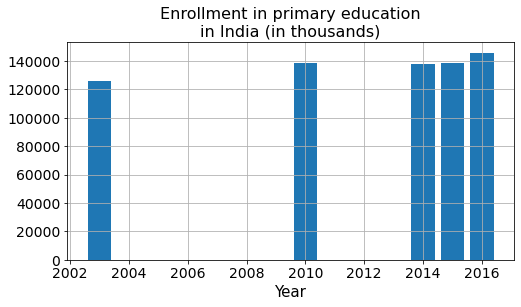

In [26]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.show()

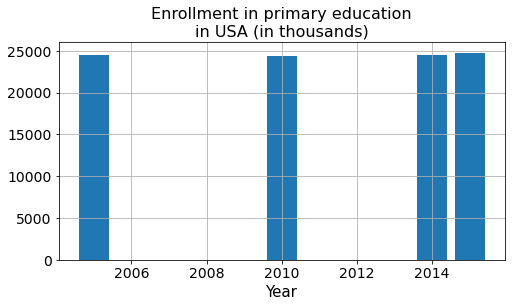

In [27]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin USA (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.show()

In [28]:
# We have missing data that we need to fix
missing_years = [y for y in range(2004,2010)]+[y for y in range(2011,2014)]

In [29]:
dict_missing = {'Region/Country/Area':['India']*9,'Year':missing_years,'Data':'Students enrolled in primary education (thousands)'*9,
               'Enrollments (Thousands)':[np.nan]*9,'Footnotes':[np.nan]*9}

In [30]:
df_missing = pd.DataFrame(data=dict_missing)

In [31]:
primary_enrollment_india = primary_enrollment_india.append(df_missing,ignore_index=True,sort=True)

In [32]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
2,Students enrolled in primary education (thousa...,137809.0,NaN,India,2014
3,Students enrolled in primary education (thousa...,138518.0,NaN,India,2015
4,Students enrolled in primary education (thousa...,145803.0,NaN,India,2016
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
7,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2008


In [33]:
primary_enrollment_india.sort_values(by='Year',inplace=True)
primary_enrollment_india.reset_index(inplace=True,drop=True)

In [34]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
2,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
3,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
4,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2008
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2009
7,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2011
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2012


In [35]:
# Use interpolation to fill in missing values
primary_enrollment_india.interpolate(inplace=True)

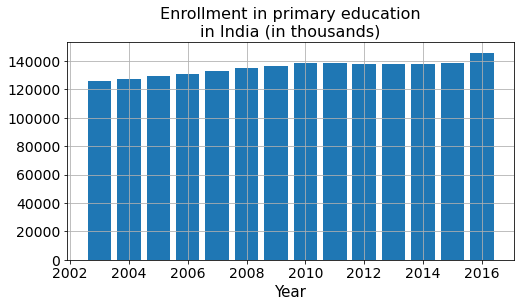

In [36]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.show()

In [37]:
# We have missing data that we need to fix
missing_years = [2004]+[y for y in range(2006,2010)]+[y for y in range(2011,2014)]+[2016]

In [38]:
dict_missing = {'Region/Country/Area':['United States of America']*9,'Year':missing_years,'Data':'Students enrolled in primary education (thousands)'*9,
               'Enrollments (Thousands)':[np.nan]*9,'Footnotes':[np.nan]*9}

In [39]:
df_missing = pd.DataFrame(data=dict_missing)

In [40]:
primary_enrollment_USA = primary_enrollment_USA.append(df_missing,ignore_index=True,sort=True)

In [41]:
primary_enrollment_USA.sort_values(by='Year',inplace=True)

In [42]:
primary_enrollment_USA.reset_index(inplace=True,drop=True)

In [43]:
primary_enrollment_USA.interpolate(inplace=True)

In [44]:
primary_enrollment_USA

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,NaN,NaN,United States of America,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,2013


In [45]:
primary_enrollment_USA.interpolate(method='linear',limit_direction='backward',limit=1)

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,2013


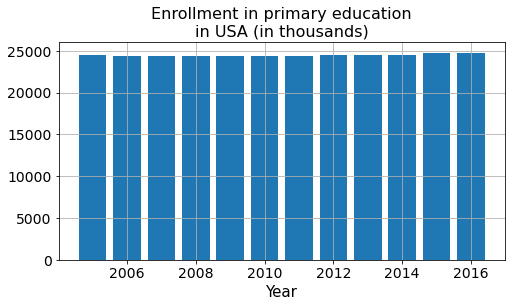

In [46]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin USA (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year',fontsize=15)
plt.show()